In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
diamonds = pd.read_csv('../data/diamonds.csv')
default_plot_color = sns.color_palette()[0]

### Dataset Overview

In [95]:
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [96]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Quantitative Variables of Interest

### Prices

From the first plot, we can see our prices form a highly skewed right-tailed distribution. Given this, we should also try performing a log transform.

After applying the log transformation to our prices, we can see that our data is roughly bimodal with one peak between \$500 and \$1000 and another around \$5000. We should also note that there is not a smooth tail at the end of our distribution as it is abruptly cut off near the maximum value.

<Axes: xlabel='price', ylabel='Count'>

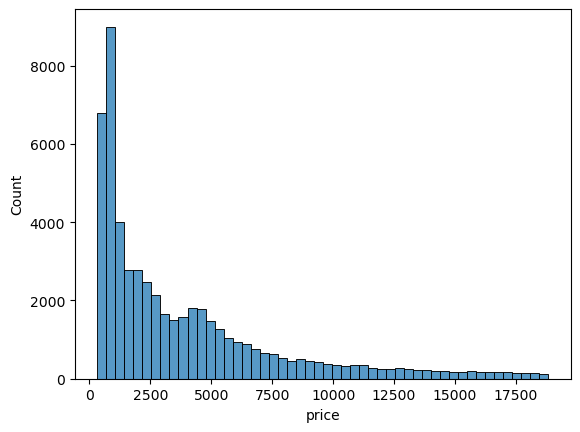

In [108]:
sns.histplot(diamonds['price'], bins=50)

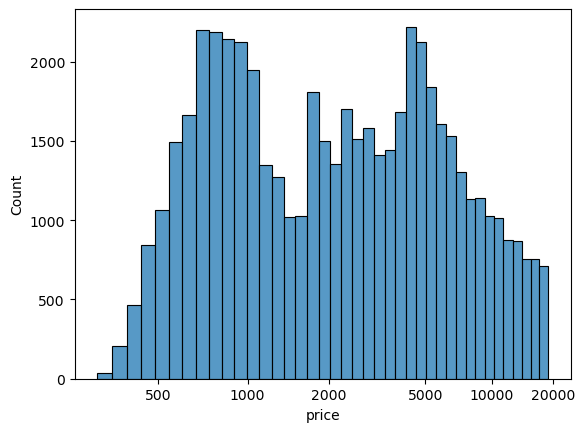

In [113]:
sns.histplot(np.log10(diamonds['price']), bins=40)
plt.xscale('log')
xticks = [500, 1000, 2000, 5000, 10000, 20000]
plt.xticks(np.log10(xticks), xticks);

### Weight - Carat

From the below plots, we can see there appears to be a trend of certain size with decreasing frequencies following before another spike. This may suggest industry standards or preferences for certain sizes.

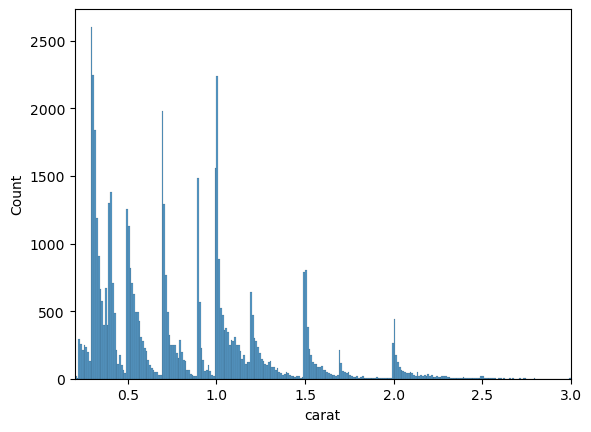

In [99]:
bin_edges = np.arange(.2, 5, .01)
sns.histplot(diamonds['carat'], bins=bin_edges)
plt.xlim(.2, 3);

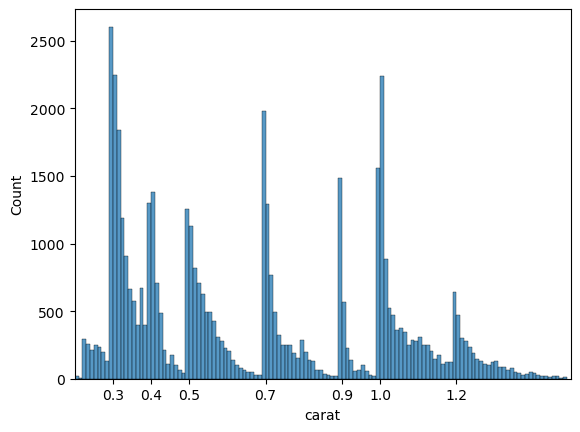

In [100]:
bin_edges = np.arange(.2, 1.5, 0.01)
sns.histplot(diamonds['carat'], bins=bin_edges, )
plt.xlim(.2, 1.5)
plt.xticks([.3, .4, .5, .7, .9, 1, 1.2]);

# Categorical Variables of Interest

After a quick look at the dataset, the first thing to notice is that the categorical variables are all ordered. Thus, when plotting these values, we should place them in order of increasing value/importance.

### Cut

From the below plots, we can see "Ideal" is the mode for the cut of diamonds. There is a steady decline in the number of diamonds in decreasing cut quality order.

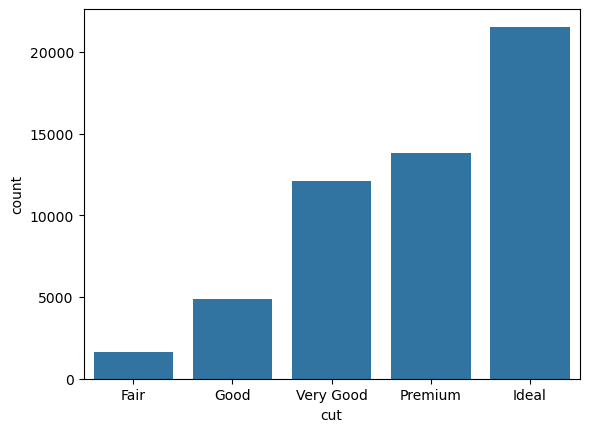

In [101]:
cuts = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'] # worst to best
sns.countplot(data=diamonds, x='cut', color=default_plot_color, order=cuts);

<Axes: xlabel='cut', ylabel='proportion'>

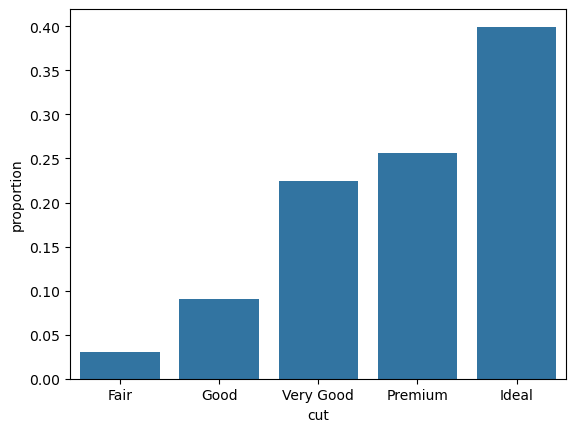

In [102]:
cut_normalized_df = diamonds.groupby('cut').size().reset_index(name='proportion')
cut_normalized_df['proportion'] = cut_normalized_df['proportion'] / len(diamonds)

sns.barplot(data=cut_normalized_df, x='cut', y='proportion', color=default_plot_color, order=cuts)

### Color

From the plots below, we can see that the "Color" distribution is roughly unimodal with the most common color being "G".

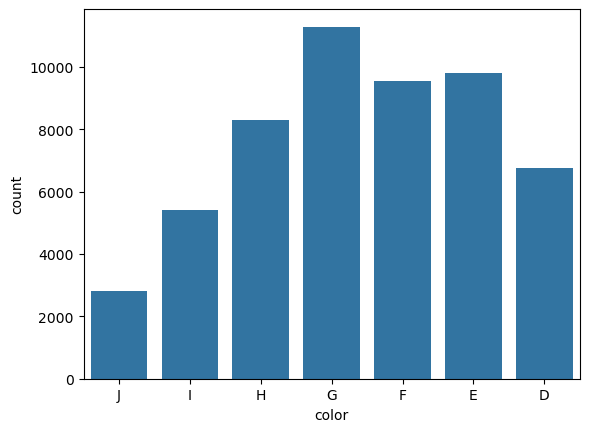

In [103]:
diamond_colors = ['J', 'I', 'H', 'G', 'F', 'E', 'D'] # worst to best
sns.countplot(data=diamonds, x='color', color=default_plot_color, order=diamond_colors);

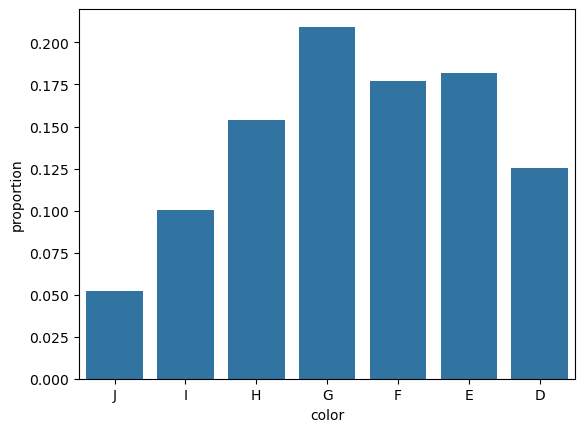

In [104]:
normalized_color_df = diamonds.groupby('color').size().reset_index(name='proportion')
normalized_color_df['proportion'] = normalized_color_df['proportion'] / len(diamonds)

sns.barplot(data=normalized_color_df, x='color', y='proportion', color=default_plot_color, order=diamond_colors);

### Clarity

From the below plots, we can see that there is a right-skew in our data with most diamonds having slight or very slight inclusions (SI2, SI1, VS2, VS1). Very few diamonds have visible inclusions (I1).

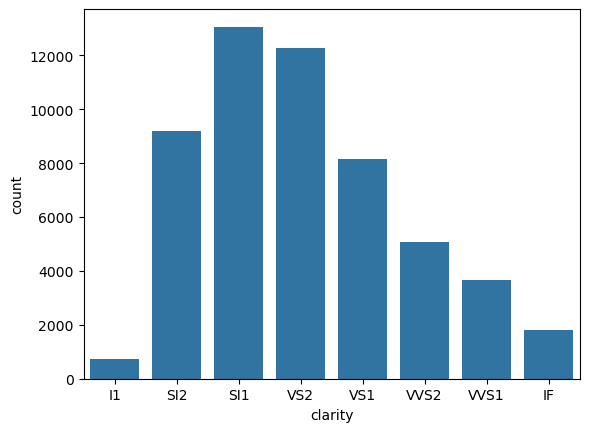

In [105]:
clarities = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'] # worst to best
sns.countplot(data=diamonds, x='clarity', color=default_plot_color, order=clarities);

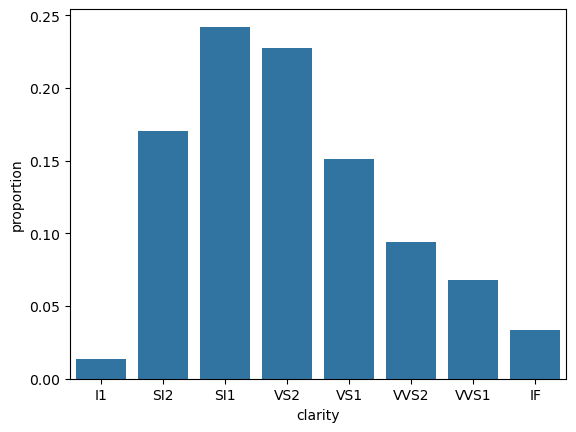

In [106]:
# diamonds['clarity'].value_counts(normalize=True).reset_index(name='proportion') # alternative, but 'clarity' column is renamed to 'index'
normalized_clarity_df = diamonds.groupby('clarity').size().reset_index(name='proportion')
normalized_clarity_df['proportion'] = normalized_clarity_df['proportion'] / len(diamonds)

sns.barplot(data=normalized_clarity_df, x='clarity', y='proportion', color=default_plot_color, order=clarities);